IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Souleymane Mbaye*

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [18]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## I. Données synthèse

### 1. Chargement du fichier et prétraitement

In [19]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [20]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

In [21]:
noms_cols = [col for col in data_synthese.columns if  col != "Code AGB" \
                                                  and col != "Code CIQUAL" \
                                                  and col != "Groupe d'aliment" \
                                                  and col != "Nom du Produit en Français" \
                                                  and col != "LCI Name" \
                                                  and col != "Sous-groupe d'aliment" \
                                                  and col != "Saisonnalité" \
                                                  and col != "Livraison" \
                                                  and col != "Matériau d'emballage" \
                                                  and col != "Préparation" \
  ]
len(noms_cols)

17

### 2. Apprentissage supervisé

#### 2.1 Prédiction du groupe d'aliment

In [22]:
groupe_ali = data_synthese["Groupe d'aliment"].unique()
desc_ga = data_synthese[noms_cols]
label_ga = np.array([np.argmax([groupe_ali == g]) for g in data_synthese["Groupe d'aliment"]])

In [23]:
import time

N = len(label_ga)
n_80 = int(0.8*N)
index = np.random.permutation(N)

Xu,Yu = np.asarray(desc_ga.iloc[index[:n_80]]), label_ga[index[:n_80]]
XTu, YTu = np.asarray(desc_ga.iloc[index[n_80:]]), label_ga[index[n_80:]]

arb = cl.ClassifierArbreNumerique(17, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xu, Yu)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xu, Yu)
perf_T = arb.accuracy(XTu, YTu)

print(f"Arbre numérique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

Arbre numérique
  Perfs : 1.0, 0.8427, en 14.16 secondes


Prédiction du groupe d'aliment avec les colonnes non numériques et numériques

In [24]:
noms_cols = [col for col in data_synthese.columns if  col != "Code AGB" \
                                                  and col != "Code CIQUAL" \
                                                  and col != "Groupe d'aliment" \
                                                  and col != "Nom du Produit en Français" \
                                                  and col != "LCI Name" \
                                                  and col != "Sous-groupe d'aliment" \
  ]
len(noms_cols)

21

In [25]:
desc_ga = np.asarray(data_synthese[noms_cols])
label_ga = np.asarray(data_synthese["Groupe d'aliment"])

In [26]:
index = np.random.permutation(len(desc_ga))

Xm = desc_ga[index]
Ym = label_ga[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(21, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_4  -> Valeur inconnue:  Four 
	*** Warning: attribut  att_4  -> Valeur inconnue:  Pas de préparation 
	*** Warning: attribut  att_4  -> Valeur inconnue:  Four 
	*** Warning: attribut  att_4  -> Valeur inconnue:  Micro onde
Arbre générique
  Perfs : 1.0, 0.9194, en 16.36 secondes


J'ai essayé de prédire le goupe d'aliment en fonction des autres colonnes(celles numeriques) mais le résultat n'est pas satisfaisant, une accuracy de moins de 0.333.
En lieu et place avec l'utilisation d'un arbre me donne de très bonnes performances(100% sur les données de train et plus de 94% sur les données de test).

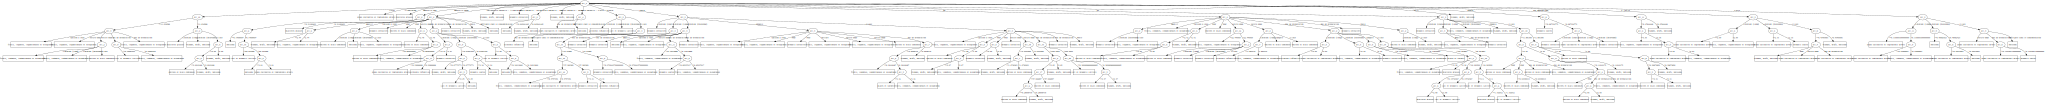

In [27]:
import graphviz as gv

# Construction de la représentation graphique (affichage)
graphe_arbre_1 = gv.Digraph(format='png')
arb.affiche(graphe_arbre_1)

# Affichage du graphe obtenu:
graphe_arbre_1

Nous montont un peu plus en performance avec l'arbre général plus de 93% contre 92%

Taille du train set : (1983, 21)
Taille du test set : (496, 21)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_2  -> Valeur inconnue:  Congelé
	*** Warning: attribut  att_2  -> Valeur inconnue:  Glacé
	*** Warning: attribut  att_4  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_4  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_2  -> Valeur inconnue:  Congelé
	*** Warning: attribut  att_4  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_4  -> Valeur inconnue:  Pas de préparation 
	*** Warning: attribut  att_4  -> Valeur inconnue:  Bouilli
i 1
	*** Warning: attribut  att_2  -> Valeur inconnue:  Glacé
	*** Warning: attribut  att_4  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_4  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_2  -> Valeur inconnue:  Congelé
	*** Warning: attribut  att_4  -> Valeur inconnue:  Pas de préparation 
	*** Warning: attribut  att_4  -> Val

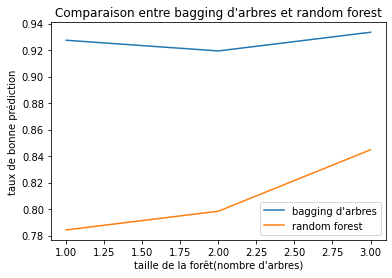

performance en moyenne foret (0.926747311827957, 3.342149381431398e-05)
performance en moyenne random foret (0.8091397849462365, 0.000667526592669672)


In [28]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_ga[index]
Ym = label_ga[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 3

for b in range(1,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(1,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

#### 2.2 Prédiction du changement climatique

Nous essayons de prédire les impacts à partir d'une description donnée

In [29]:
noms_cols = [
  "Groupe d'aliment", \
  "Sous-groupe d'aliment",  \
  "Saisonnalité", \
  "Transport par avion (1 : par avion)",  \
  "Livraison",  \
  "Matériau d'emballage",  \
  "Préparation",  \
  "DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)",  \
  "Score unique EF (mPt/kg de produit)",  \
]
len(noms_cols)


9

In [30]:
data_synthese["Changement climatique (kg CO2 eq/kg de produit)"].describe()

count    2479.000000
mean        5.909752
std         9.138402
min         0.021047
25%         1.086875
50%         2.718176
75%         6.289730
max        62.729303
Name: Changement climatique (kg CO2 eq/kg de produit), dtype: float64

In [31]:
def quartile(v,Q1,Q2,Q3):
  if v<Q1:
    return 0

  if v<Q2:
    return 1

  if v<Q3:
    return 2

  return 3

In [32]:
Q1, Q2, Q3 = 1.086875, 2.718176, 6.289730
desc_cc = np.asarray(data_synthese[noms_cols])
label_cc = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese["Changement climatique (kg CO2 eq/kg de produit)"]])

In [33]:
index = np.random.permutation(len(desc_ga))

Xm = desc_cc[index]
Ym = label_cc[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
Arbre générique
  Perfs : 1.0, 0.8831, en 0.7913 secondes


Pour classification de l'intervalle du changement climatique à partir des données d'entrées avec le classifieur arbre de décision, nous avons obtenu une performance de 100% sur les données train et plus de 87% sur les données de test.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur i

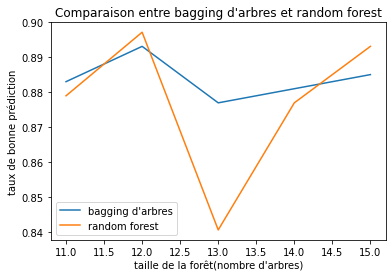

performance en moyenne foret (0.8838709677419354, 2.8616024973985396e-05)
performance en moyenne random foret (0.8774193548387098, 0.00039737252861602585)


In [34]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_cc[index]
Ym = label_cc[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Cette coube montre que l'on peut atteindre une performance jusqu'à 90% environ avec le classifieur random forest pour prédire l'intervalle du changement climatique.

#### 2.3 Prédiction de l'appauvrissement de la couche d'ozone

In [35]:
col = "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        0.572436
std         4.913065
min         0.008919
25%         0.160290
50%         0.261981
75%         0.540185
max       243.449330
Name: Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit), dtype: float64

In [36]:
Q1, Q2, Q3 = 0.160290, 0.261981, 0.540185
desc_co = np.asarray(data_synthese[noms_cols])
label_co = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_co)

2479

In [37]:
index = np.random.permutation(len(desc_ga))

Xm = desc_cc[index]
Ym = label_cc[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  PVC
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (moyenne)
Arbre générique
  Perfs : 1.0, 0.8669, en 0.6895 secondes


Pour la classification de l'intervalle dans lequel se situe l'Appauvrissement de la couche d'ozone à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de plus de 87% sur les données de test.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_1  -> Valeur inconnue:  confitures et assimilés
	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
	*** Warning: attribut  att_5  -> Valeur inconnue:  Pas d'emballage
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  PS
	*** Warning: attribut  att_5  -> Valeur inconnue:  LPDE
	*** Warning: attribut  att_5  -> Valeur inconnue:  LPDE
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinai

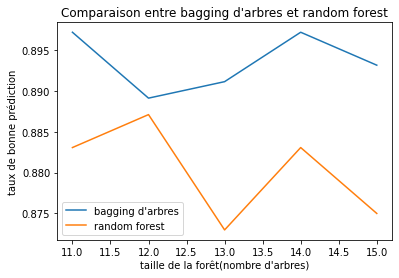

performance en moyenne foret (0.8935483870967744, 1.0405827263267466e-05)
performance en moyenne random foret (0.880241935483871, 2.861602497398554e-05)


In [38]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_co[index]
Ym = label_co[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Nous nous rendons compte que la performance peut monter jusqu'à près de 90% avec un classifieur bagging d'arbres.

#### 2.4 Prédiction du Rayonnements ionisants (kBq U-235 eq/kg de produit)

In [39]:
col = "Rayonnements ionisants (kBq U-235 eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        1.239127
std         1.898260
min         0.040985
25%         0.448390
50%         0.821225
75%         1.352461
max        33.548897
Name: Rayonnements ionisants (kBq U-235 eq/kg de produit), dtype: float64

In [40]:
Q1, Q2, Q3 = 0.448390, 0.821225, 1.352461
desc_ri = np.asarray(data_synthese[noms_cols])
label_ri = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_ri)

2479

In [41]:
index = np.random.permutation(len(desc_ga))

Xm = desc_ri[index]
Ym = label_ri[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_4  -> Valeur inconnue:  Glacé
	*** Warning: attribut  att_6  -> Valeur inconnue:  Micro onde
Arbre générique
  Perfs : 1.0, 0.875, en 0.7112 secondes


Pour la classification de l'intervalle dans lequel se situe le Rayonnements ionisants à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de plus de 88% sur les données de test.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_6  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_6  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** Warning: attribut  att_6  -> Valeur inconnue:  Friture
	*** 

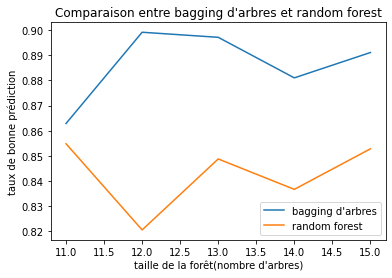

performance en moyenne foret (0.8862903225806452, 0.000176573881373569)
performance en moyenne random foret (0.8427419354838708, 0.00016259105098855356)


In [42]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_ri[index]
Ym = label_ri[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Nous nous rendons compte que la performance peut monter jusqu'à près de 90% avec un classifieur bagging d'arbres.

#### 2.5 Prédiction Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)

In [43]:
col = "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean       21.503554
std        42.971933
min         0.061076
25%         3.610219
50%         8.112630
75%        17.607225
max       328.588610
Name: Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit), dtype: float64

In [44]:
Q1, Q2, Q3 = 3.610219, 8.112630, 17.607225
desc_fp = np.asarray(data_synthese[noms_cols])
label_fp = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_fp)

2479

In [45]:
index = np.random.permutation(len(desc_ga))

Xm = desc_fp[index]
Ym = label_fp[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

Arbre générique
  Perfs : 1.0, 0.8831, en 0.6726 secondes


Pour la classification de l'intervalle dans lequel se situe la "Formation photochimique d'ozone à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de presque 100% sur les données de test.
Ce qui est performance très très satisfaisante.

#### 2.6 Prédiction des Particules (E-06 disease inc./kg de produit)

In [46]:
col = "Particules (E-06 disease inc./kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        0.576737
std         0.886995
min         0.001434
25%         0.081927
50%         0.237220
75%         0.692287
max         6.372366
Name: Particules (E-06 disease inc./kg de produit), dtype: float64

In [47]:
Q1, Q2, Q3 = 0.081927, 0.237220, 0.692287
desc_pa = np.asarray(data_synthese[noms_cols])
label_pa= np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_pa)

2479

In [48]:
index = np.random.permutation(len(desc_ga))

Xm = desc_pa[index]
Ym = label_pa[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  Pas d'emballage
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
Arbre générique
  Perfs : 1.0, 0.9073, en 0.6966 secondes


Pour la classification de l'intervalle dans lequel se situe le nombre de particules à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de plus de 88% sur les données de test.
Ce qui est performance très très satisfaisante.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_1  -> Valeur inconnue:  autres matières grasses
	*** Warning: attribut  att_1  -> Valeur inconnue:  autres matières grasses
	*** Warning: attribut  att_5  -> Valeur inconnue:  Papier
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_5  -> Valeur inconnue:  LPDE
	*** Warning: attribut  att_5  -> Valeur inconnue:  LPDE
	*** Warning: attribut  att_5  -> Valeur inconnue:  LPDE
	*** Warning: attribut  att_5  -> Valeur inconnue:  Carton
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_1  -> Valeur inconnue:  autres matières grasses
	*** Warning: attribut  att_1  -> Vale

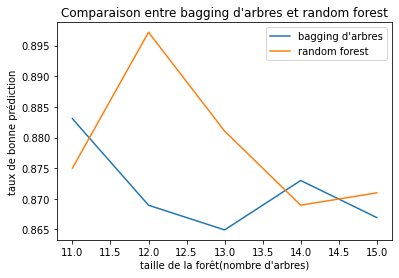

performance en moyenne foret (0.8713709677419355, 4.12981269510927e-05)
performance en moyenne random foret (0.8786290322580645, 0.00010308272632674347)


In [49]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_pa[index]
Ym = label_pa[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Nous avons environ les mêmes performances.

#### 2.7 Prédiction de l'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)'

In [50]:
col = "Acidification terrestre et eaux douces (mol H+ eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        0.082070
std         0.131431
min         0.000112
25%         0.009345
50%         0.033240
75%         0.097694
max         0.945773
Name: Acidification terrestre et eaux douces (mol H+ eq/kg de produit), dtype: float64

In [51]:
Q1, Q2, Q3 = 0.009345, 0.033240, 0.097694
desc_at = np.asarray(data_synthese[noms_cols])
label_at = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_at)

2479

In [52]:
index = np.random.permutation(len(desc_ga))

Xm = desc_at[index]
Ym = label_at[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
Arbre générique
  Perfs : 1.0, 0.8911, en 0.636 secondes


Pour la classification de l'intervalle dans lequel se situe la valeur d'acidification terrestre à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de 90% sur les données de test.

#### 2.8 Prédiction Eutrophisation terreste (mol N eq/kg de produit)

In [53]:
col = "Eutrophisation terreste (mol N eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        0.322537
std         0.552303
min         0.000257
25%         0.032719
50%         0.119196
75%         0.343948
max         4.198274
Name: Eutrophisation terreste (mol N eq/kg de produit), dtype: float64

In [54]:
Q1, Q2, Q3 = 0.032719, 0.119196, 0.343948
desc_et = np.asarray(data_synthese[noms_cols])
label_et = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_et)

2479

In [55]:
index = np.random.permutation(len(desc_ga))

Xm = desc_et[index]
Ym = label_et[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_2  -> Valeur inconnue:  de saison
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation 
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_6  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_6  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
Arbre générique
  Perfs : 1.0, 0.877, en 0.7365 secondes


Pour la classification de l'intervalle dans lequel se situe l'Eutrophisation terreste à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de plus de 90% sur les données de test.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_1  -> Valeur inconnue:  condiments
	*** Warning: attribut  att_1  -> Valeur inconnue:  laits et boissons infantiles
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_5  -> Valeur inconnue:  Carton
	*** Warning: attribut  att_5  -> Valeur inconnue:  Carton
	*** Warning:

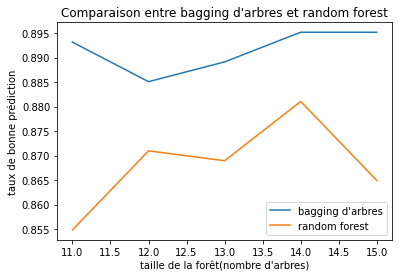

performance en moyenne foret (0.8915322580645162, 1.528355879292385e-05)
performance en moyenne random foret (0.8681451612903226, 7.251560874089511e-05)


In [56]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_et[index]
Ym = label_et[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Nous nous rendons compte que la performance peut monter jusqu'à un peu plus de 91% avec un classifieur bagging d'arbres.

#### 2.9 Prédiction Eutrophisation eaux douces (E-03 kg P eq/kg de produit)

In [57]:
col = "Eutrophisation eaux douces (E-03 kg P eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        0.994563
std         2.567846
min         0.009151
25%         0.230663
50%         0.561079
75%         1.054684
max        33.277122
Name: Eutrophisation eaux douces (E-03 kg P eq/kg de produit), dtype: float64

In [58]:
Q1, Q2, Q3 = 0.230663, 0.561079, 1.054684
desc_ee = np.asarray(data_synthese[noms_cols])
label_ee = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_ee)

2479

In [59]:
index = np.random.permutation(len(desc_ga))

Xm = desc_ee[index]
Ym = label_ee[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_5  -> Valeur inconnue:  Pas d'emballage
	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
Arbre générique
  Perfs : 1.0, 0.8629, en 0.7641 secondes


Pour la classification de l'intervalle dans lequel se situe l'Eutrophisation eaux douces à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de plus de 87% sur les données de test.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_1  -> Valeur inconnue:  autres matières grasses
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (moyenne)
	*** Warning: attribut  att_6  -> Valeur inconnue:  Micro onde
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Vale

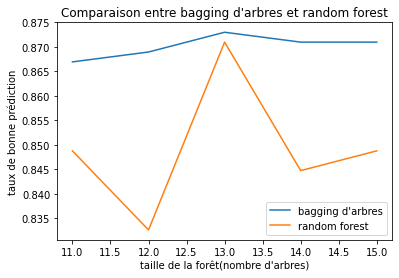

performance en moyenne foret (0.8701612903225806, 4.22736732570235e-06)
performance en moyenne random foret (0.8491935483870968, 0.0001534859521331948)


In [60]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_ee[index]
Ym = label_ee[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Performance presque la même.

#### 2.10 Prédiction de Eutrophisation marine (E-03 kg N eq/kg de produit)

In [61]:
col = "Eutrophisation marine (E-03 kg N eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean       28.171974
std        50.225766
min         0.029341
25%         4.955565
50%        13.013942
75%        27.858909
max       668.339590
Name: Eutrophisation marine (E-03 kg N eq/kg de produit), dtype: float64

In [62]:
Q1, Q2, Q3 = 4.955565, 13.013942, 27.858909
desc_em = np.asarray(data_synthese[noms_cols])
label_em = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_ri)

2479

In [63]:
index = np.random.permutation(len(desc_ga))

Xm = desc_em[index]
Ym = label_em[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_6  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
Arbre générique
  Perfs : 1.0, 0.8851, en 0.6958 secondes


Pour la classification de l'intervalle dans lequel se situe l'Eutrophisation marine à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de plus de 86% sur les données de test.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_6  -> Valeur inconnue:  Four
	*** Warning: attribut  att_6  -> Valeur inconnue:  Four
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_6  -> Valeur inconnue:  Micro onde
	*** Warning: attribut  att_6  -> Valeur inconnue:  Four
	*** Warning: attribut  att_6  -> Valeur inconnue:  Four
	*** Warning: attribut  att_6  -> Valeur inconnue:  Four
	*** Warning: attribut  att_5  -> Valeur inconnue:  Carton
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation 
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (moyenne)
	*** Warning: attribut  att_4  -> Valeur

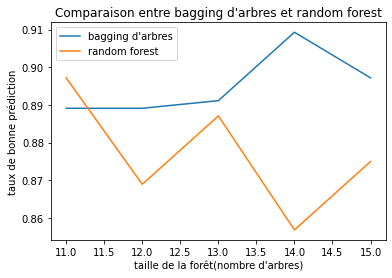

performance en moyenne foret (0.8951612903225806, 5.853277835587929e-05)
performance en moyenne random foret (0.877016129032258, 0.0001967351716961506)


In [64]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_em[index]
Ym = label_em[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Le graphique montre une performe jusqu'à presque 90% possible.

#### 2.11 Prédiction de l'Utilisation du sol (Pt/kg de produit)

In [65]:
col = "Utilisation du sol (Pt/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean      308.182513
std       659.117300
min      -125.337470
25%        26.979608
50%       108.803440
75%       268.827470
max      5537.686700
Name: Utilisation du sol (Pt/kg de produit), dtype: float64

In [66]:
Q1, Q2, Q3 = 26.979608, 108.803440, 268.827470
desc_ut = np.asarray(data_synthese[noms_cols])
label_ut = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_ut)

2479

In [67]:
index = np.random.permutation(len(desc_ga))

Xm = desc_ut[index]
Ym = label_ut[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation 
	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Micro onde
	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
Arbre générique
  Perfs : 1.0, 0.8528, en 0.8258 secondes


Pour la classification de l'intervalle dans lequel se situe l'Utilisation du sol à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et d'environ 83% sur les données de test.
Performance bonne mais pas tellement satisfaisante.

#### 2.12 Prédiction de Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)

In [68]:
col = "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean      110.487409
std       149.496454
min         1.246828
25%        32.244438
50%        74.607942
75%       134.641320
max      2965.885600
Name: Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit), dtype: float64

In [69]:
Q1, Q2, Q3 = 32.244438, 74.607942, 134.641320
desc_eea = np.asarray(data_synthese[noms_cols])
label_eea = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_eea)

2479

In [70]:
index = np.random.permutation(len(desc_ga))

Xm = desc_eea[index]
Ym = label_eea[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
	*** Warning: attribut  att_4  -> Valeur inconnue:  Ambiant (long)
	*** Warning: attribut  att_5  -> Valeur inconnue:  Acier
Arbre générique
  Perfs : 1.0, 0.8206, en 0.8447 secondes


Pour la classification de l'intervalle dans lequel se situe l'Écotoxicité pour écosystèmes aquatiques d'eau douce à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et d'environ 82% sur les données de test.
Performance bonne mais pas tellement satisfaisante.

Taille du train set : (1983, 9)
Taille du test set : (496, 9)
On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0
Tirage avec remise
	*** Warning: attribut  att_1  -> Valeur inconnue:  sels
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  aides culinaires
	*** Warning: attribut  att_1  -> Valeur inconnue:  desserts infantiles
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_1  -> Valeur inconnue:  mollusques et crustacés cuits
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_1  -> Valeur inconnue:  sels
	*** Warning: attribut  att_5  -> Valeur inconnue:  LPDE
	*** Warning: attribut  att_6  -> Valeur inconnue:  Micro onde 
	*** War

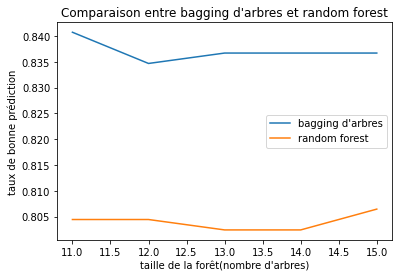

performance en moyenne foret (0.8370967741935484, 3.902185223725225e-06)
performance en moyenne random foret (0.8040322580645161, 2.2762747138397643e-06)


In [71]:
# Bagging d'arbres
index = np.random.permutation(len(desc_ga))

Xm = desc_eea[index]
Ym = label_eea[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]



print('Taille du train set :',Xm_train.shape)
print('Taille du test set :',Xm_test.shape)
print("On choisit: 75% des exemples pour construire un arbre et seuil d'entropie à 0.0")
print("Tirage avec remise")

proportion,seuil,remise,nb_att = 0.75,0,True,2
perf_foret = []
perf_random_foret = []
n = 15

for b in range(11,n+1):
  foret = cl.ClassifierBaggingTree(b,proportion,seuil,remise)
  foret.train((Xm_train,Ym_train))
  
  random_foret = cl.ClassifierRandomForest(b,proportion,seuil,remise,nb_att)
  random_foret.train((Xm_train,Ym_train))
  
  perf_foret.append(foret.accuracy(Xm_test,Ym_test))
  perf_random_foret.append(random_foret.accuracy(Xm_test,Ym_test))
  print("i",b)

X = [i for i in range(11,n+1)]
Y_perf_foret = perf_foret
Y_perf_random_foret = perf_random_foret

plt.plot(X,Y_perf_foret,label="bagging d'arbres")
plt.plot(X,Y_perf_random_foret,label="random forest")

plt.ylabel("taux de bonne prédiction")
plt.xlabel("taille de la forêt(nombre d'arbres)")

plt.title("Comparaison entre bagging d'arbres et random forest")
plt.legend()
plt.show()

print("performance en moyenne foret",ut.analyse_perfs(perf_foret))
print("performance en moyenne random foret",ut.analyse_perfs(perf_random_foret))

Ca ne change pas trop les performances.

#### 2.13 Prédiction de Épuisement des ressources eau (m3 depriv./kg de produit)

In [72]:
col = "Épuisement des ressources eau (m3 depriv./kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        5.755834
std        17.266273
min       -15.066491
25%         1.200812
50%         2.706662
75%         5.579348
max       463.921320
Name: Épuisement des ressources eau (m3 depriv./kg de produit), dtype: float64

In [73]:
Q1, Q2, Q3 = 1.200812, 2.706662, 5.579348
desc_er = np.asarray(data_synthese[noms_cols])
label_er = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_er)

2479

In [74]:
index = np.random.permutation(len(desc_ga))

Xm = desc_er[index]
Ym = label_er[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_6  -> Valeur inconnue:  Poêle
	*** Warning: attribut  att_4  -> Valeur inconnue:  Congelé
	*** Warning: attribut  att_6  -> Valeur inconnue:  Four
	*** Warning: attribut  att_5  -> Valeur inconnue:  Carton
	*** Warning: attribut  att_5  -> Valeur inconnue:  Pas d'emballage
	*** Warning: attribut  att_5  -> Valeur inconnue:  Verre
Arbre générique
  Perfs : 1.0, 0.7984, en 0.9192 secondes


Prédiction plus que parfaite sur les données d'entrainement et celles de test 100%.

#### 2.14 Prédiction de Épuisement des ressources énergétiques (MJ/kg de produit)

In [75]:
col = "Épuisement des ressources énergétiques (MJ/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean       53.483357
std        56.788961
min         2.029826
25%        23.001550
50%        34.986512
75%        62.902074
max       788.907720
Name: Épuisement des ressources énergétiques (MJ/kg de produit), dtype: float64

In [76]:
Q1, Q2, Q3 = 23.001550, 34.986512, 62.902074
desc_eren = np.asarray(data_synthese[noms_cols])
label_eren = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_eren)

2479

In [77]:
index = np.random.permutation(len(desc_ga))

Xm = desc_eren[index]
Ym = label_eren[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_1  -> Valeur inconnue:  céréales et biscuits infantiles
	*** Warning: attribut  att_6  -> Valeur inconnue:  Pas de préparation
	*** Warning: attribut  att_1  -> Valeur inconnue:  céréales et biscuits infantiles
	*** Warning: attribut  att_6  -> Valeur inconnue:  Micro onde
	*** Warning: attribut  att_5  -> Valeur inconnue:  V (PVC)
	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_5  -> Valeur inconnue:  PP
	*** Warning: attribut  att_5  -> Valeur inconnue:  Pas d'emballage
	*** Warning: attribut  att_1  -> Valeur inconnue:  céréales et biscuits infantiles
Arbre générique
  Perfs : 1.0, 0.8589, en 0.6467 secondes


Pour la classification de l'intervalle dans lequel se situe l'épuisement des ressources énergétiques à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et celles de test.
Performance très satisfaisante.

#### 2.15 Prédiction de Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)

In [78]:
col = "Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)"
data_synthese[col].describe()

count    2479.000000
mean        9.055566
std        19.029156
min         0.108256
25%         2.686771
50%         5.041574
75%        10.082564
max       258.657730
Name: Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit), dtype: float64

In [79]:
Q1, Q2, Q3 = 2.686771, 5.041574, 10.082564
desc_erm = np.asarray(data_synthese[noms_cols])
label_erm = np.asarray([quartile(v,Q1,Q2,Q3) for v in data_synthese[col]])
len(label_erm)

2479

In [80]:
index = np.random.permutation(len(desc_ga))

Xm = desc_erm[index]
Ym = label_erm[index]

n_80 = int(0.8 * len(Ym))
Xm_train,Ym_train,Xm_test,Ym_test = Xm[:n_80],Ym[:n_80],Xm[n_80:],Ym[n_80:]

arb = cl.ClassifierArbre(9, 1e-3)

tic = time.time()  # On lance le chrono
arb.train(Xm_train, Ym_train)
toc = time.time()  # On arrête le chrono

perf_A = arb.accuracy(Xm_train, Ym_train)
perf_T = arb.accuracy(Xm_test, Ym_test)

print(f"Arbre générique\n  Perfs : {perf_A:.4}, {perf_T:.4}, en {toc-tic:0.4} secondes")

	*** Warning: attribut  att_6  -> Valeur inconnue:  Bouilli
	*** Warning: attribut  att_5  -> Valeur inconnue:  PVC
	*** Warning: attribut  att_5  -> Valeur inconnue:  Carton
Arbre générique
  Perfs : 1.0, 0.8306, en 0.8003 secondes


Pour la classification de l'intervalle dans lequel se situe l'épuisement des ressources à partir des données d'entrées avec le classifieur d'arbre générique, nous avons une performance de 100% sur les données d'entrainement et de presque 100% sur les données de test.
Performance très satisfaisante.

### 3. Apprentissage non supervisé

In [81]:
noms_cols = [
  "Changement climatique (kg CO2 eq/kg de produit)", \
  "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)",  \
  "Rayonnements ionisants (kBq U-235 eq/kg de produit)",  \
  "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)",  \
  "Particules (E-06 disease inc./kg de produit)",  \
  "Acidification terrestre et eaux douces (mol H+ eq/kg de produit)",  \
  "Eutrophisation terreste (mol N eq/kg de produit)",  \
  "Eutrophisation eaux douces (E-03 kg P eq/kg de produit)",  \
  "Eutrophisation marine (E-03 kg N eq/kg de produit)",  \
  "Utilisation du sol (Pt/kg de produit)",  \
  "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)",  \
  "Épuisement des ressources eau (m3 depriv./kg de produit)",  \
  "Épuisement des ressources énergétiques (MJ/kg de produit)",  \
  "Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)"
]
len(noms_cols)

14

In [82]:
data_synthese_norm = clust.normalisation(data_synthese[noms_cols])
len(data_synthese_norm)

2479

Nb points avec qualite 1 exellante: 54


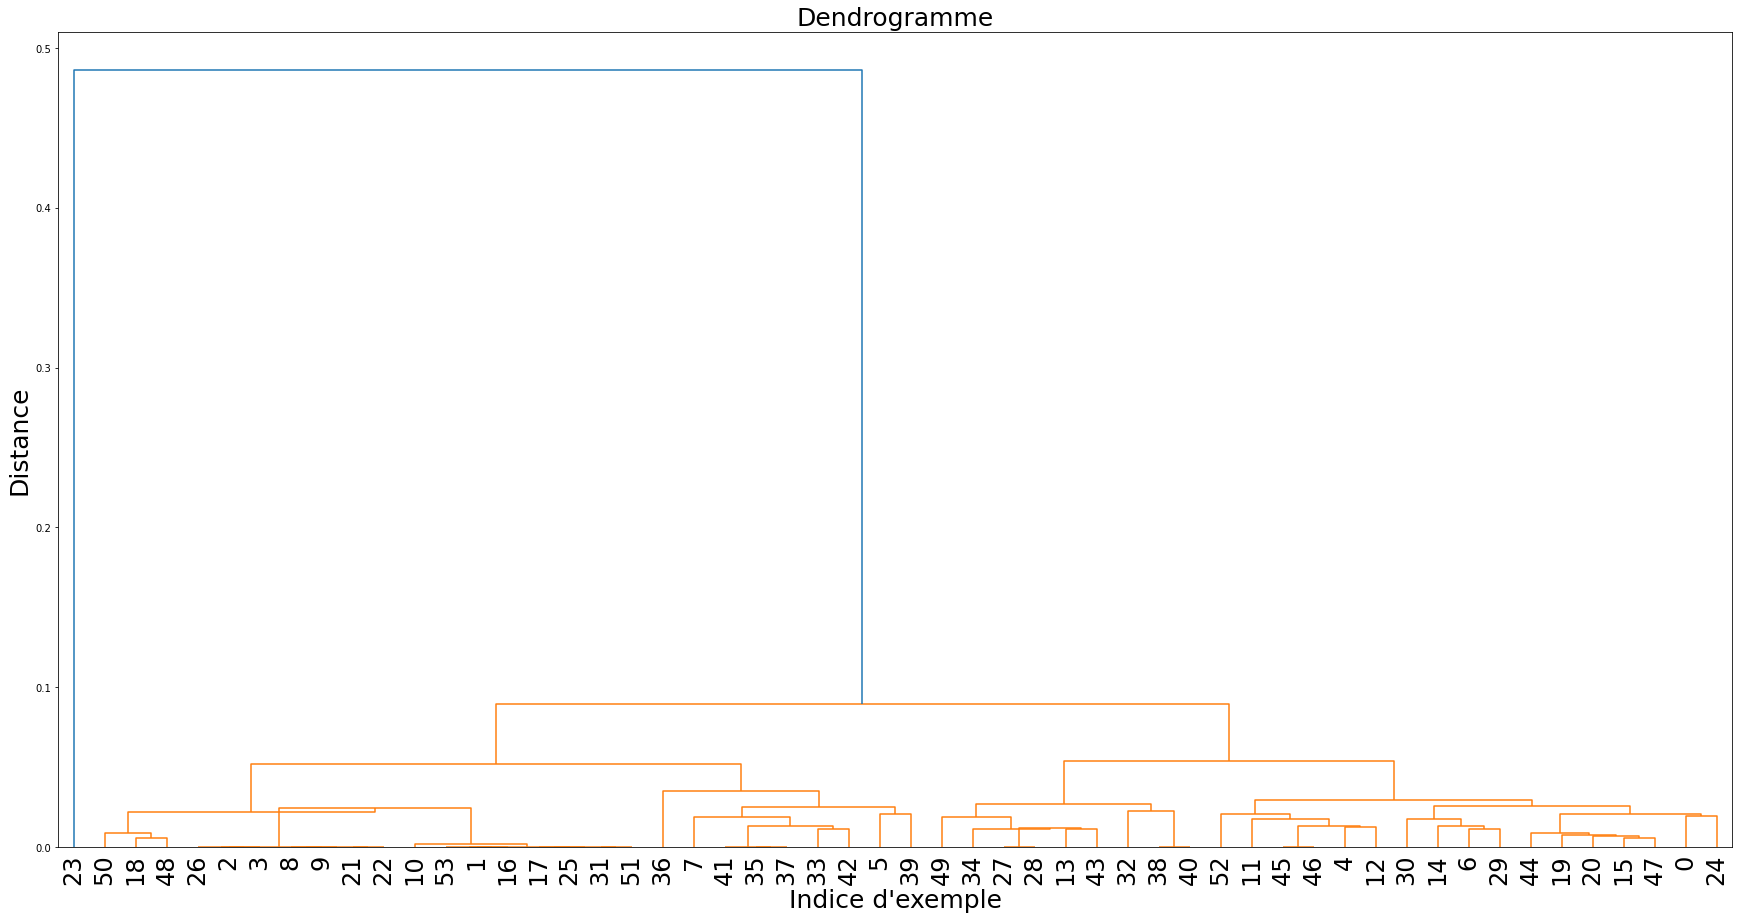

[[1, 16, 0.0, 2],
 [2, 3, 0.0, 2],
 [8, 9, 0.0, 2],
 [17, 25, 0.0, 2],
 [21, 22, 0.0, 2],
 [26, 55, 0.0, 3],
 [27, 28, 0.0, 2],
 [31, 51, 0.0, 2],
 [35, 37, 0.0, 2],
 [38, 40, 0.0, 2],
 [41, 62, 0.0, 3],
 [45, 46, 0.0, 2],
 [53, 54, 0.0, 3],
 [56, 58, 0.0, 4],
 [57, 61, 0.0, 4],
 [66, 68, 4.9065389333867974e-18, 7],
 [59, 67, 1.4304896245381992e-17, 7],
 [10, 69, 0.0017309778228225658, 8],
 [15, 47, 0.005543705670211744, 2],
 [18, 48, 0.005643287089007778, 2],
 [20, 72, 0.006980225259280816, 3],
 [19, 74, 0.007839381576271637, 4],
 [44, 75, 0.008841086305251841, 5],
 [50, 73, 0.00903832147037511, 3],
 [13, 43, 0.011126566214208135, 2],
 [33, 42, 0.011344147635659536, 2],
 [6, 29, 0.011595951147228594, 2],
 [60, 78, 0.012045843385287835, 4],
 [34, 81, 0.01140567844625066, 5],
 [4, 12, 0.01229733329863242, 2],
 [65, 83, 0.01300625290921144, 4],
 [64, 79, 0.013077418300434188, 5],
 [14, 80, 0.013435021211737666, 3],
 [11, 84, 0.017281620094605033, 5],
 [30, 86, 0.01742386429940541, 4],
 [

In [83]:
qualite_1 = data_synthese["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"] < 1.9
print("Nb points avec qualite 1 exellante:",qualite_1.sum())
clust.clustering_hierarchique(data_synthese_norm[qualite_1],methode="centroid linkage",dendrogramme=True)

#### 3.1 Essayons de regrouper par groupe d'aliment

In [84]:
groupe_ali = data_synthese["Groupe d'aliment"].unique()
iter_max = 10000
k = len(groupe_ali)
les_centres, l_affectation = clust.kmoyennes(k,data_synthese_norm,1e-5,iter_max)

/Users/souleymbaye/Documents/MesDocs/UPMC/UPMCL3/LU3IN026/projet-2/../iads/Clustering.py:83: RuntimeWarning: Mean of empty slice.
  return data.mean(axis=0)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [85]:
print("Inertie globale",clust.inertie_globale(data_synthese_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_synthese_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_synthese_norm,les_centres,l_affectation))

Inertie globale 59.95663068430991
Index de Dunn 0.14522373748942238
Index de Xie Beni 0.0011998920328196126


Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: fruits, légumes, légumineuses et oléagineux
Le groupe dominant dans cette partie: produits céréaliers
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: aides culinaires et ingrédients divers
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: fruits, légumes, légumineuses et oléagineux


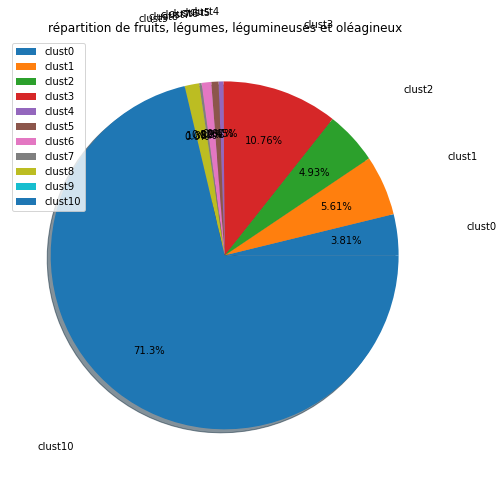

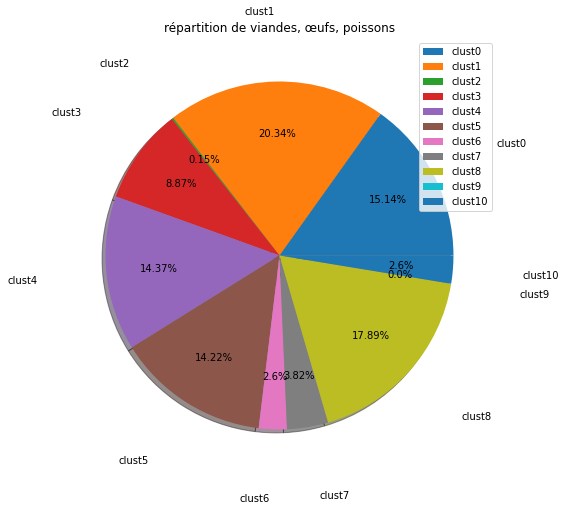

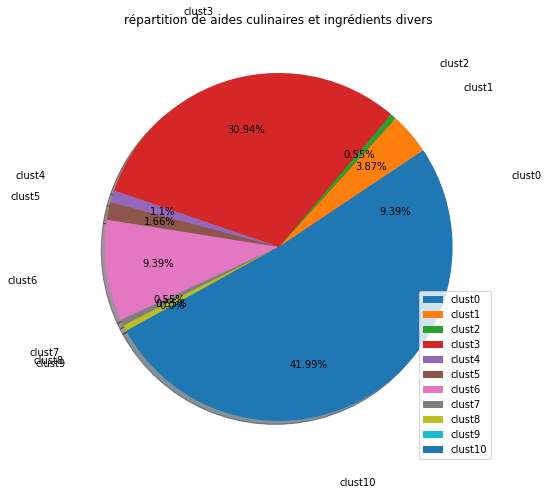

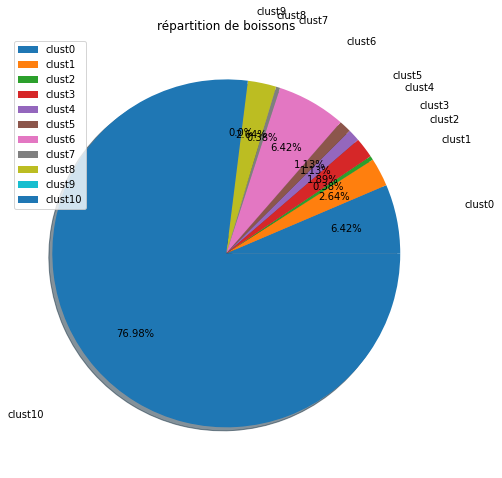

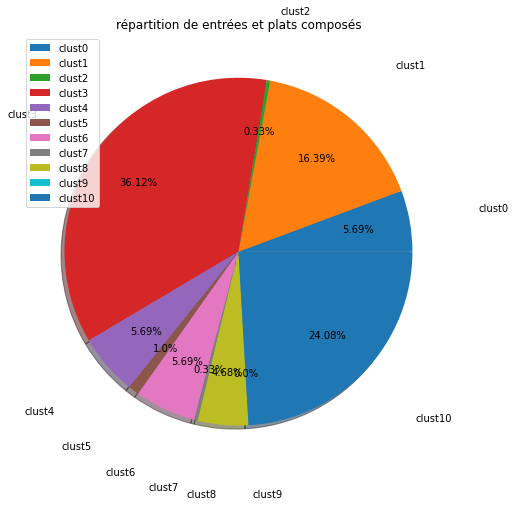

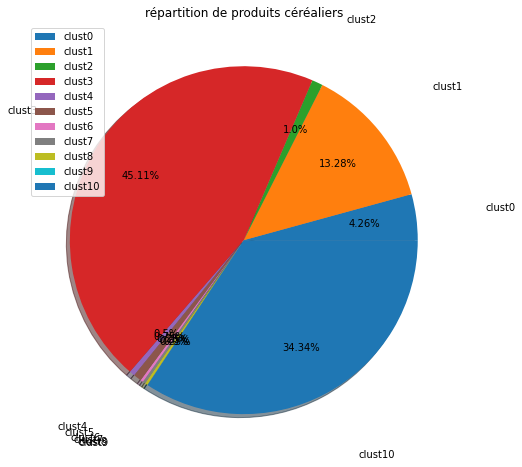

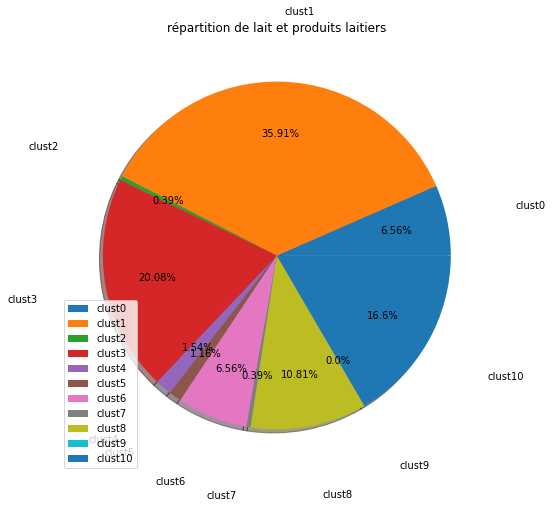

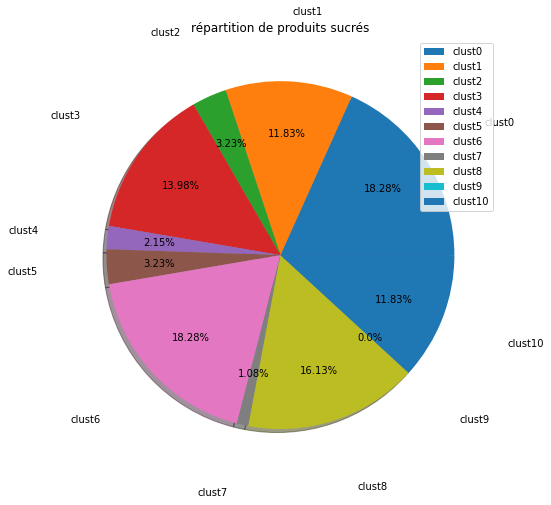

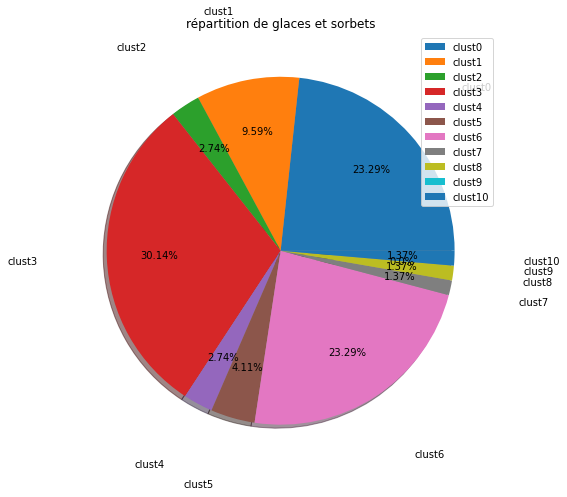

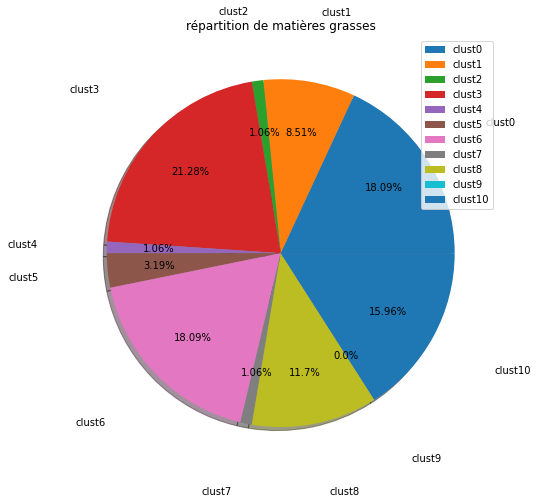

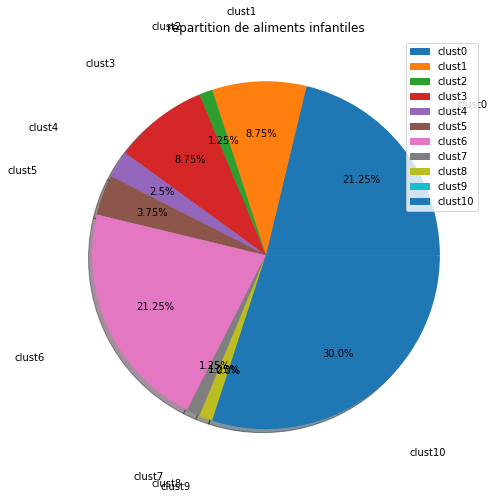

In [86]:
# Groupe d'aliment représentatif

for ind in l_affectation:
  g = np.asarray(data_synthese.iloc[l_affectation[ind]]["Groupe d'aliment"])
  if len(g) > 0:
    gs, nb = np.unique(g,return_counts=True)
    g_rep = gs[np.argmax(nb)]
    print('Le groupe dominant dans cette partie:',g_rep)

# Groupe d'aliment représentatif
for g in groupe_ali:
  rep_g = []
  for ind in l_affectation:
    clus = np.asarray(data_synthese.iloc[l_affectation[ind]]["Groupe d'aliment"])
    n = 0
    if len(clus) > 0:
      gs, nb = np.unique(clus,return_counts=True)
      n = nb[np.argmax(gs==g)]
      
    rep_g.append(n)
  
  plt.figure(figsize = (8, 8))
  lab = ["clust"+str(i) for i in l_affectation ]
  plt.pie( rep_g, labels = lab, normalize = True,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
  plt.title("répartition de "+g)
  plt.legend()

#### 3.2 Essayons de regrouper par sous groupe d'aliment

In [87]:
sgroupe_ali = data_synthese["Sous-groupe d'aliment"].unique()
print("Nb sous groupes aliments",sgroupe_ali.shape)
iter_max = 10000
k = len(sgroupe_ali)
les_centres, l_affectation = clust.kmoyennes(k,data_synthese_norm,1e-5,iter_max)

Nb sous groupes aliments (58,)


In [88]:
print("Inertie globale",clust.inertie_globale(data_synthese_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_synthese_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_synthese_norm,les_centres,l_affectation))

Inertie globale 14.06686295274948
Index de Dunn 0.7771689216066909
Index de Xie Beni 0.0008591079667020095


In [89]:
# Sous groupe d'aliment représentatif

for ind in l_affectation:
  g = np.asarray(data_synthese.iloc[l_affectation[ind]]["Sous-groupe d'aliment"])
  if len(g) > 0:
    gs, nb = np.unique(g,return_counts=True)
    g_rep = gs[np.argmax(nb)]
    print('Le sous-groupe dominant dans cette partie:',g_rep)

Le sous-groupe dominant dans cette partie: viandes crues
Le sous-groupe dominant dans cette partie: céréales de petit-déjeuner et biscuits
Le sous-groupe dominant dans cette partie: fruits
Le sous-groupe dominant dans cette partie: charcuteries
Le sous-groupe dominant dans cette partie: légumes
Le sous-groupe dominant dans cette partie: viandes crues
Le sous-groupe dominant dans cette partie: fromages
Le sous-groupe dominant dans cette partie: poissons crus
Le sous-groupe dominant dans cette partie: plats composés
Le sous-groupe dominant dans cette partie: charcuteries
Le sous-groupe dominant dans cette partie: algues
Le sous-groupe dominant dans cette partie: légumes
Le sous-groupe dominant dans cette partie: fromages
Le sous-groupe dominant dans cette partie: céréales de petit-déjeuner et biscuits
Le sous-groupe dominant dans cette partie: fruits à coque et graines oléagineuses
Le sous-groupe dominant dans cette partie: boisson alcoolisées
Le sous-groupe dominant dans cette partie: s

#### 3.3 Essayons de regrouper par Saisonnalité

In [90]:
groupe_sais = data_synthese["Saisonnalité"].unique()
print("Nb saisons",groupe_sais.shape)
iter_max = 10000
k = len(groupe_sais)
les_centres, l_affectation = clust.kmoyennes(k,data_synthese_norm,1e-5,iter_max)

Nb saisons (3,)


In [91]:
print("Inertie globale",clust.inertie_globale(data_synthese_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_synthese_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_synthese_norm,les_centres,l_affectation))

Inertie globale 124.42144168644464
Index de Dunn 0.04001588124219855
Index de Xie Beni 0.003995482316562804


In [92]:
# Saison représentative

for ind in l_affectation:
  g = np.asarray(data_synthese.iloc[l_affectation[ind]]["Saisonnalité"])
  if len(g) > 0:
    gs, nb = np.unique(g,return_counts=True)
    g_rep = gs[np.argmax(nb)]
    print('Le sous-groupe dominant dans cette partie:',g_rep)

Le sous-groupe dominant dans cette partie: mix de consommation FR
Le sous-groupe dominant dans cette partie: mix de consommation FR
Le sous-groupe dominant dans cette partie: mix de consommation FR


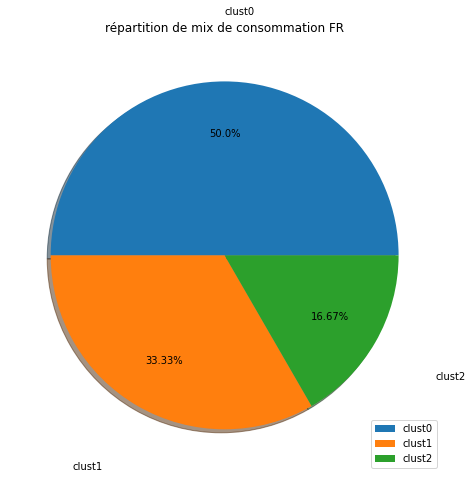

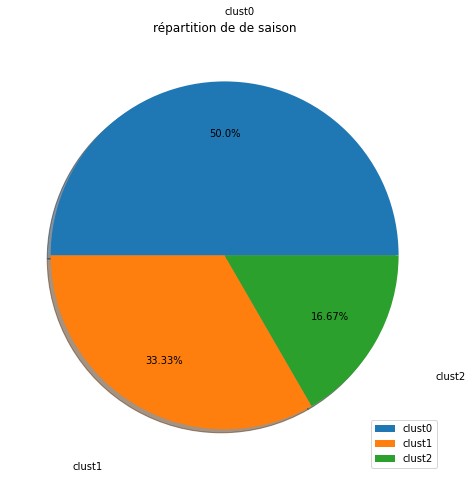

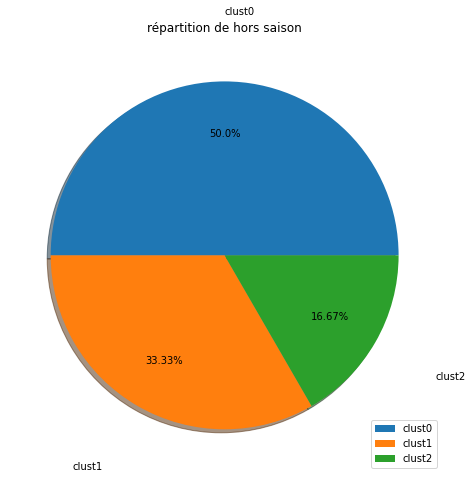

In [93]:
for g in groupe_sais:
  rep_g = []
  for ind in l_affectation:
    clus = np.asarray(data_synthese.iloc[l_affectation[ind]]["Sous-groupe d'aliment"])
    n = 0
    if len(clus) > 0:
      gs, nb = np.unique(clus,return_counts=True)
      n = nb[np.argmax(gs==g)]
      
    rep_g.append(n)
  
  plt.figure(figsize = (8, 8))
  lab = ["clust"+str(i) for i in l_affectation ]
  plt.pie( rep_g, labels = lab, normalize = True,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
  plt.title("répartition de "+g)
  plt.legend()

#### 3.4 Préparation

In [94]:
groupe_prep = data_synthese["Préparation"].unique()
print("Nb prepations",groupe_prep.shape)
iter_max = 10000
k = len(groupe_prep)
les_centres, l_affectation = clust.kmoyennes(k,data_synthese_norm,1e-5,iter_max)

Nb prepations (11,)


In [95]:
print("Inertie globale",clust.inertie_globale(data_synthese_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_synthese_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_synthese_norm,les_centres,l_affectation))

Inertie globale 51.93747522448969
Index de Dunn 0.16638283779044308
Index de Xie Beni 0.0013479691724824906


In [96]:
# Préparation représentative

for ind in l_affectation:
  g = np.asarray(data_synthese.iloc[l_affectation[ind]]["Préparation"])
  if len(g) > 0:
    gs, nb = np.unique(g,return_counts=True)
    g_rep = gs[np.argmax(nb)]
    print('Le sous-groupe dominant dans cette partie:',g_rep)

Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation
Le sous-groupe dominant dans cette partie: Pas de préparation


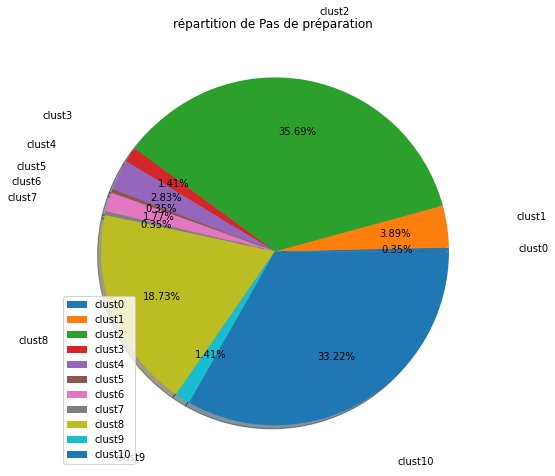

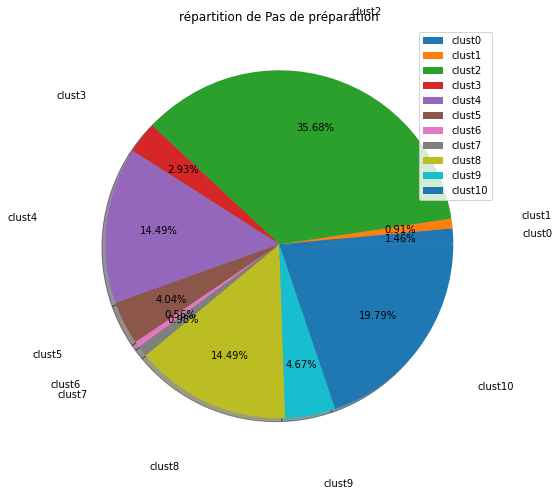

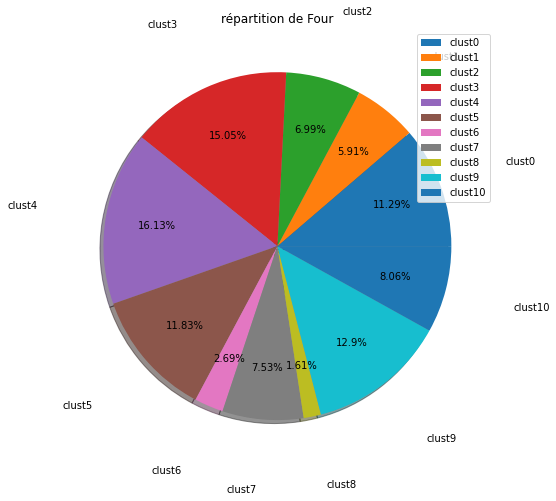

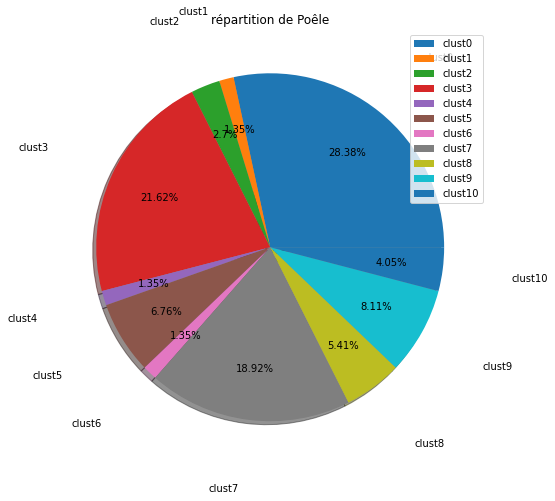

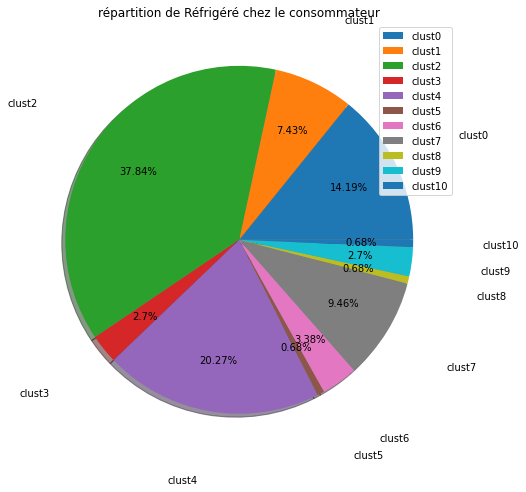

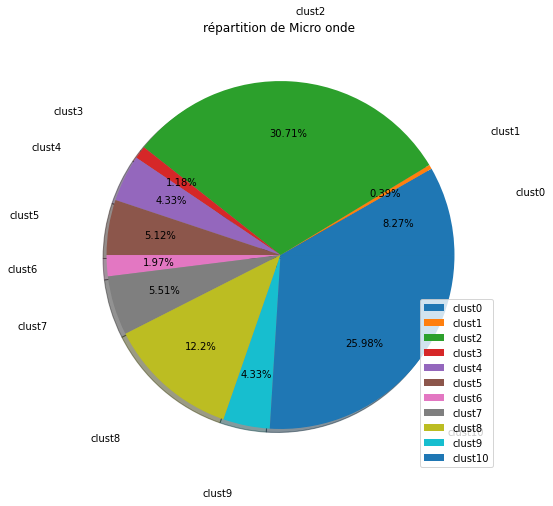

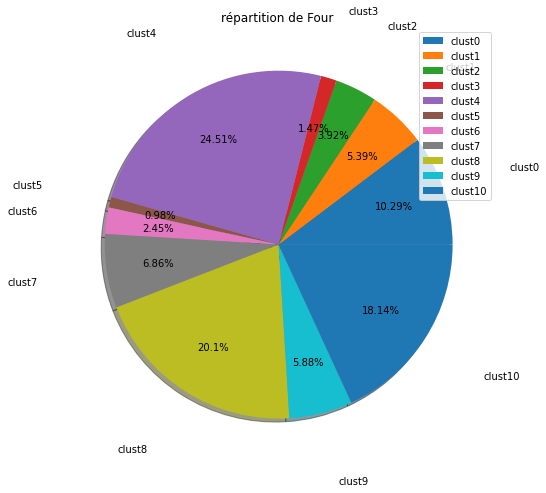

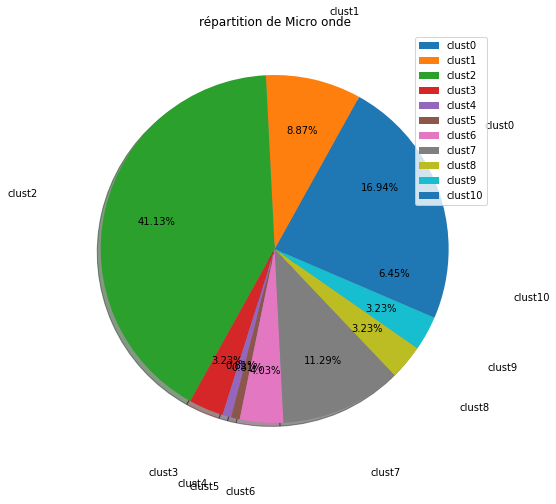

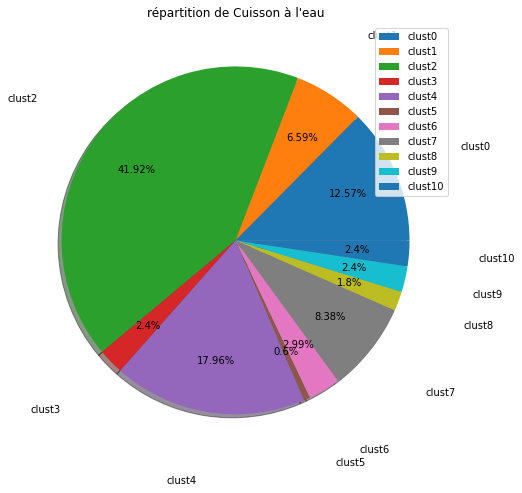

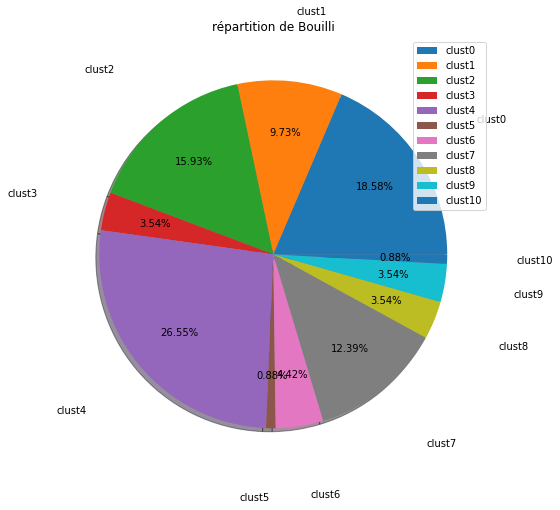

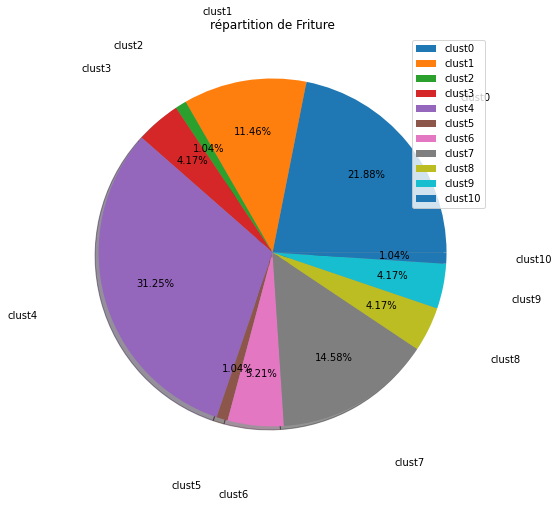

In [97]:
groupe_prep = data_synthese["Préparation"].unique()
for g in groupe_prep:
  rep_g = []
  for ind in l_affectation:
    clus = np.asarray(data_synthese.iloc[l_affectation[ind]]["Préparation"])
    n = 0
    if len(clus) > 0:
      gs, nb = np.unique(clus,return_counts=True)
      n = nb[np.argmax(gs==g)]
      
    rep_g.append(n)
  
  plt.figure(figsize = (8, 8))
  lab = ["clust"+str(i) for i in l_affectation ]
  plt.pie( rep_g, labels = lab, normalize = True,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
  plt.title("répartition de "+g)
  plt.legend()

## II. Données ingrédients

### 1. Chargement du fichier et prétraitement

In [98]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes, colonnes: ",data_ingredient.shape)

Nombre de lignes, colonnes:  (5671, 22)


In [99]:
data_ingredient.columns

Index(['Ciqual AGB', 'Ciqual code', 'Nom Français', 'Groupe d'aliment',
       'Sous-groupe d'aliment', 'LCI Name', 'Ingredients',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de produit)',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)',
       'Épuisement des ressources eau (m3 depriv./kg de produit)',
       'Épuisement des ressources 

In [100]:
noms_cols = [col for col in data_ingredient.columns if  col != "Ciqual AGB" \
                                                  and col != "Ciqual code" \
                                                  and col != "Groupe d'aliment" \
                                                  and col != "Nom Français" \
                                                  and col != "LCI Name" \
                                                  and col != "Sous-groupe d'aliment" \
                                                  and col != "Ingredients" \
  ]
len(noms_cols)

15

In [101]:
noms_cols

['Score unique EF (mPt/kg de produit)',
 'Changement climatique (kg CO2 eq/kg de produit)',
 "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)",
 'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
 "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)",
 'Particules (E-06 disease inc./kg de produit)',
 'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
 'Eutrophisation terreste (mol N eq/kg de produit)',
 'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
 'Eutrophisation marine (E-03 kg N eq/kg de produit)',
 'Utilisation du sol (Pt/kg de produit)',
 "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)",
 'Épuisement des ressources eau (m3 depriv./kg de produit)',
 'Épuisement des ressources énergétiques (MJ/kg de produit)',
 'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)']

### 2. Apprentissage supervisé

#### 2.1 Prédiction du groupe d'aliment

J'ai essayé de prédire le groupe d'aliment à partir des colonnes numériques mais j'ai pas grand chose.

### 3. Apprentissage non supervisé

In [102]:
noms_cols = [col for col in data_ingredient.columns if  col != "Ciqual AGB" \
                                                  and col != "Ciqual code" \
                                                  and col != "Groupe d'aliment" \
                                                  and col != "Nom Français" \
                                                  and col != "LCI Name" \
                                                  and col != "Sous-groupe d'aliment" \
                                                  and col != "Ingredients" \
  ]
len(noms_cols)

15

In [103]:
data_ingredient_norm = clust.normalisation(data_ingredient[noms_cols])
len(data_ingredient_norm)

5671

In [104]:
groupe_ali = data_ingredient["Groupe d'aliment"].unique()
iter_max = 10000
k = len(groupe_ali)
les_centres, l_affectation = clust.kmoyennes(k,data_ingredient_norm,1e-5,iter_max)

In [105]:
print("Inertie globale",clust.inertie_globale(data_ingredient_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_ingredient_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_ingredient_norm,les_centres,l_affectation))

Inertie globale 37.65782949435018
Index de Dunn 0.24452130450049067
Index de Xie Beni 0.001706016259862235


In [106]:
# Groupe d'aliment représentatif

for ind in l_affectation:
  g = np.asarray(data_ingredient.iloc[l_affectation[ind]]["Groupe d'aliment"])
  if len(g) > 0:
    gs, nb = np.unique(g,return_counts=True)
    g_rep = gs[np.argmax(nb)]
    print('Le groupe dominant dans cette partie:',g_rep)

Le groupe dominant dans cette partie: produits céréaliers
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: entrées et plats composés
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: produits céréaliers
Le groupe dominant dans cette partie: produits céréaliers
Le groupe dominant dans cette partie: produits céréaliers
Le groupe dominant dans cette partie: produits céréaliers
Le groupe dominant dans cette partie: entrées et plats composés
Le groupe dominant dans cette partie: viandes, œufs, poissons
Le groupe dominant dans cette partie: produits céréaliers


#### 3.2 par sous-groupe d'aliment

In [107]:
sgroupe_ali = data_ingredient["Sous-groupe d'aliment"].unique()
print("Nb sous groupes aliments",sgroupe_ali.shape)
iter_max = 10000
k = len(sgroupe_ali)
les_centres, l_affectation = clust.kmoyennes(k,data_ingredient_norm,1e-5,iter_max)

Nb sous groupes aliments (44,)


In [108]:
print("Inertie globale",clust.inertie_globale(data_ingredient_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_ingredient_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_ingredient_norm,les_centres,l_affectation))

Inertie globale 28.76236080735682
Index de Dunn 0.4147845285330055
Index de Xie Beni 0.00038928790571531095


In [109]:
# Sous groupe d'aliment représentatif

for ind in l_affectation:
  g = np.asarray(data_ingredient.iloc[l_affectation[ind]]["Sous-groupe d'aliment"])
  if len(g) > 0:
    gs, nb = np.unique(g,return_counts=True)
    g_rep = gs[np.argmax(nb)]
    print('Le sous-groupe dominant dans cette partie:',g_rep)

Le sous-groupe dominant dans cette partie: plats composés
Le sous-groupe dominant dans cette partie: gâteaux et pâtisseries
Le sous-groupe dominant dans cette partie: plats composés
Le sous-groupe dominant dans cette partie: céréales de petit-déjeuner et biscuits
Le sous-groupe dominant dans cette partie: produits laitiers frais et assimilés
Le sous-groupe dominant dans cette partie: plats composés
Le sous-groupe dominant dans cette partie: céréales de petit-déjeuner et biscuits
Le sous-groupe dominant dans cette partie: céréales de petit-déjeuner et biscuits
Le sous-groupe dominant dans cette partie: gâteaux et pâtisseries
Le sous-groupe dominant dans cette partie: margarines
Le sous-groupe dominant dans cette partie: céréales de petit-déjeuner et biscuits
Le sous-groupe dominant dans cette partie: plats composés
Le sous-groupe dominant dans cette partie: gâteaux et pâtisseries
Le sous-groupe dominant dans cette partie: chocolats et produits à base de chocolat
Le sous-groupe dominant 

## III. Données étape

In [110]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
print("Nombre de lignes: ",data_etape.shape)

Nombre de lignes:  (2480, 102)


In [111]:
for col in  data_etape.columns:
  print(col)


Code AGB
Code CIQUAL
Groupe d'aliment
Sous-groupe d'aliment
Nom du Produit en Français
LCI Name
DQR
Nom et code
Score unique EF (mPt / kg de produit) - Agriculture
Score unique EF (mPt / kg de produit) - Transformation
Score unique EF (mPt / kg de produit) - Emballage
Score unique EF (mPt / kg de produit) - Transport
Score unique EF (mPt / kg de produit) - Supermarché et distribution
Score unique EF (mPt / kg de produit) - Consommation
Changement climatique (kg CO2 eq/kg de produit) - Agriculture
Changement climatique (kg CO2 eq/kg de produit) - Transformation
Changement climatique (kg CO2 eq/kg de produit) - Emballage
Changement climatique (kg CO2 eq/kg de produit) - Transport
Changement climatique (kg CO2 eq/kg de produit) - Supermarché et distribution
Changement climatique (kg CO2 eq/kg de produit) - Consommation
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Agriculture
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Transformation
A

In [112]:
noms_cols = [col for col in data_etape.columns if \
  col != "Code AGB" and \
  col != "Code CIQUAL" and \
  col != "Groupe d'aliment" and \
  col != "Sous-groupe d'aliment" and \
  col != "Nom du Produit en Français" and \
  col != "LCI Name" and \
  col != "DQR" and \
  col != "Nom et code"
]
len(noms_cols)

94

In [113]:
noms_cc = [
  "Changement climatique (kg CO2 eq/kg de produit) - Agriculture",\
  "Changement climatique (kg CO2 eq/kg de produit) - Transformation",\
  "Changement climatique (kg CO2 eq/kg de produit) - Emballage",\
  "Changement climatique (kg CO2 eq/kg de produit) - Transport",\
  "Changement climatique (kg CO2 eq/kg de produit) - Supermarché et distribution",\
  "Changement climatique (kg CO2 eq/kg de produit) - Consommation",\
]
data_etape_cc_norm = clust.normalisation(data_etape[noms_cols])
print(len(data_etape_cc_norm))

2480


In [114]:
data_etape_cc_norm[:5]

,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,Score unique EF (mPt / kg de produit) - Emballage,Score unique EF (mPt / kg de produit) - Transport,Score unique EF (mPt / kg de produit) - Supermarché et distribution,Score unique EF (mPt / kg de produit) - Consommation,Changement climatique (kg CO2 eq/kg de produit) - Agriculture,Changement climatique (kg CO2 eq/kg de produit) - Transformation,Changement climatique (kg CO2 eq/kg de produit) - Emballage,Changement climatique (kg CO2 eq/kg de produit) - Transport,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,0.078718,0.025667,0.089115,0.019587,0.137573,0.017075,0.089979,0.052333,0.127249,0.018012,...,0.011282,0.032386,0.002824,0.068696,0.138819,0.035778,0.414634,0.237705,0.034301,0.455243
1,0.010252,0.041719,0.156653,0.016609,0.257822,0.071472,0.007055,0.023523,0.167114,0.015282,...,0.005064,0.028010,0.005723,0.047266,0.246984,0.012922,0.254743,0.666667,0.240106,0.235294
2,0.006397,0.026033,0.097751,0.010282,0.160619,0.000000,0.005913,0.014679,0.104279,0.009473,...,0.003160,0.017478,0.003571,0.029362,0.153862,0.000000,0.254743,0.666667,0.240106,0.235294
3,0.010252,0.041719,0.156653,0.016609,0.257822,0.071472,0.007055,0.023523,0.167114,0.015282,...,0.005064,0.028010,0.005723,0.047266,0.246984,0.012922,0.254743,0.666667,0.240106,0.235294
4,0.006397,0.026033,0.097751,0.010282,0.160619,0.000000,0.005913,0.014679,0.104279,0.009473,...,0.003160,0.017478,0.003571,0.029362,0.153862,0.000000,0.243902,0.674863,0.229551,0.225064


In [115]:
# clust.clustering_hierarchique(data_etape_cc_norm,methode="centroid linkage",dendrogramme=True)

### 1. Regroupement par groupe d'aliment

In [116]:
groupe_ali = data_etape["Groupe d'aliment"].unique()
iter_max = 10000
k = len(groupe_ali)
print("Nb groupes aliments",k)
les_centres, l_affectation = clust.kmoyennes(k,data_etape_cc_norm,1e-5,iter_max)

Nb groupes aliments 11


In [117]:
print("Inertie globale",clust.inertie_globale(data_etape_cc_norm,l_affectation))
print("Index de Dunn",clust.index_Dunn(data_etape_cc_norm,les_centres,l_affectation))
print("Index de Xie Beni",clust.index_Xie_Beni(data_etape_cc_norm,les_centres,l_affectation))

Inertie globale 1156.4478745963027
Index de Dunn 0.02501030528728785
Index de Xie Beni 0.0003773764441068267


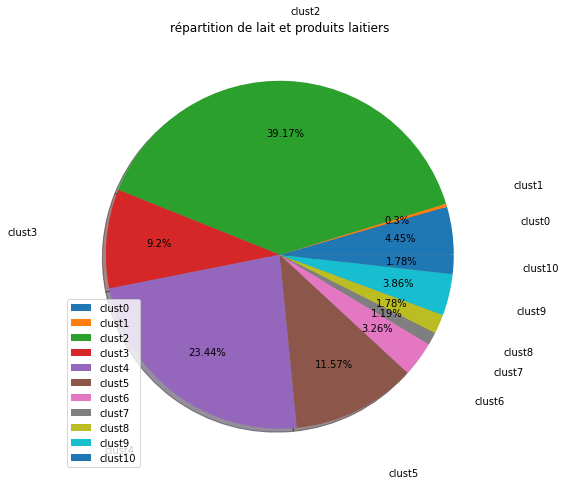

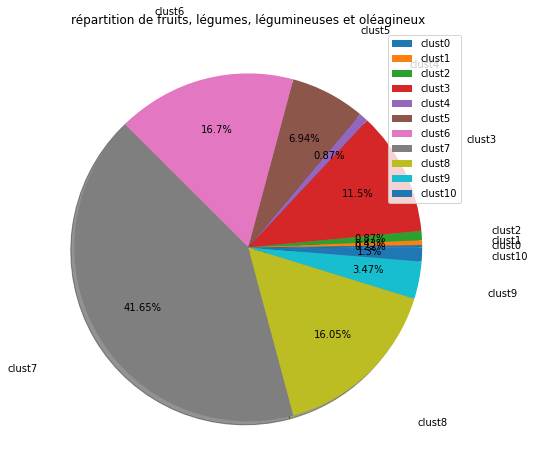

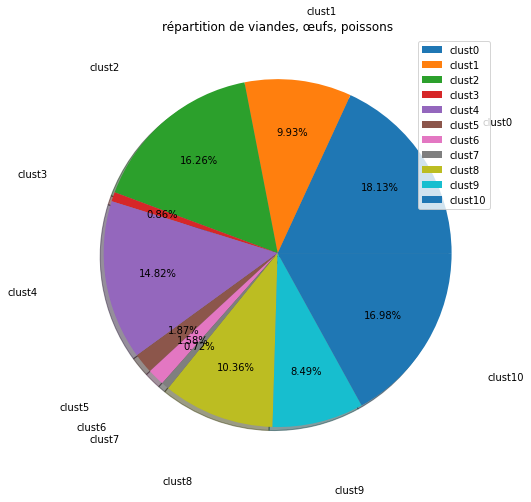

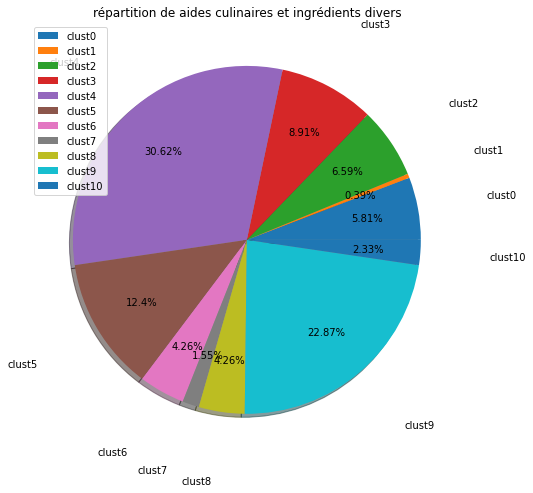

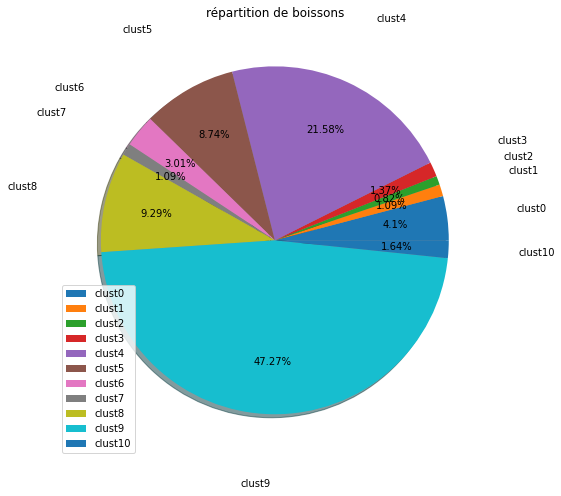

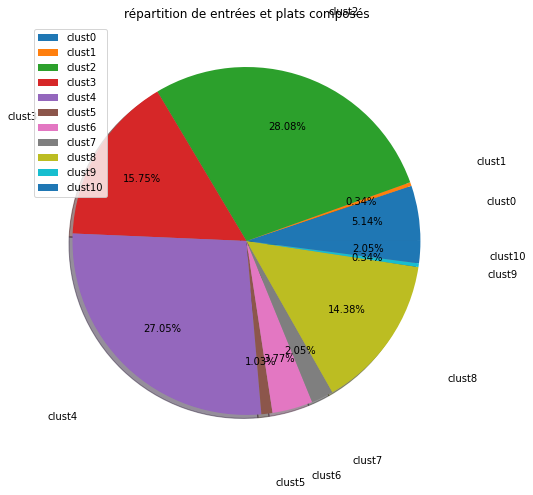

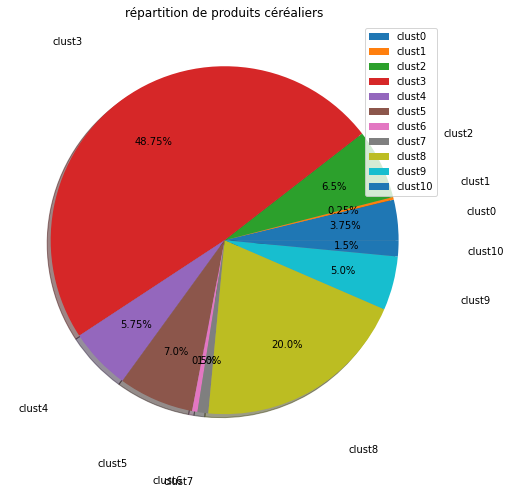

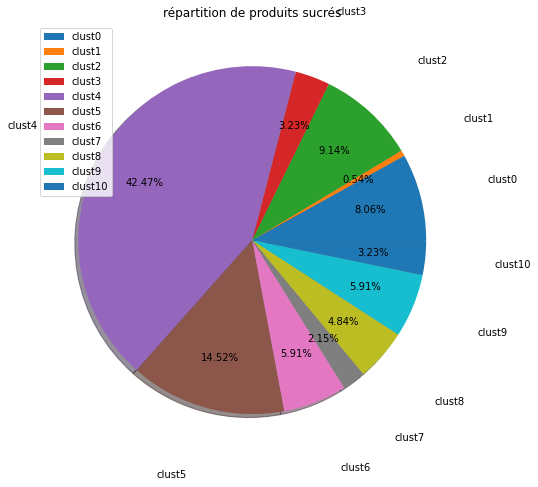

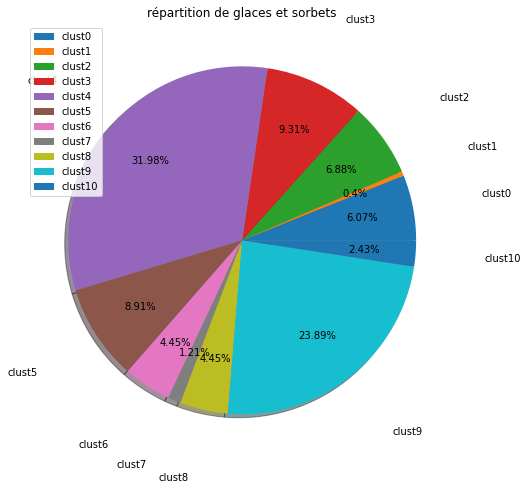

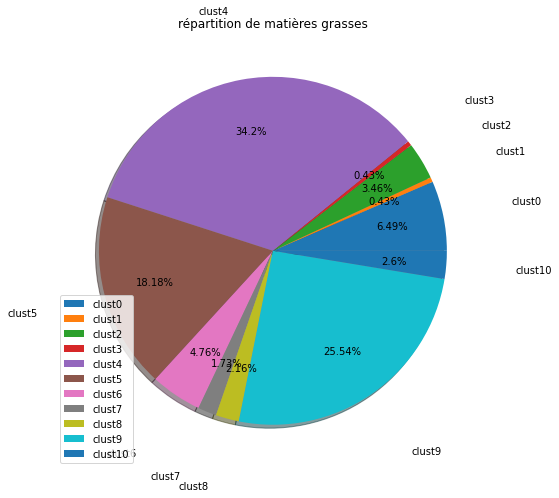

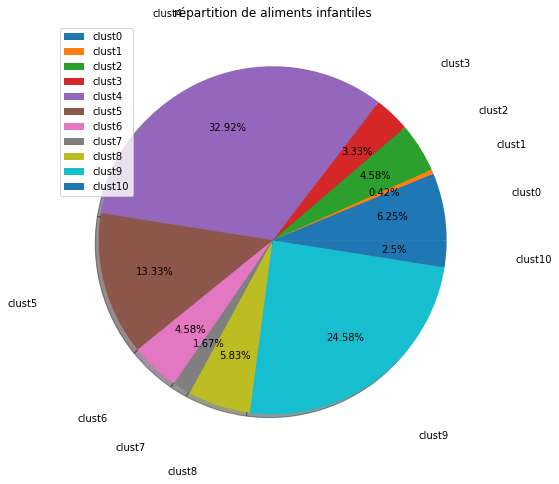

In [118]:
# Groupe d'aliment représentatif
for g in groupe_ali:
  rep_g = []
  for ind in l_affectation:
    clus = np.asarray(data_etape.iloc[l_affectation[ind]]["Groupe d'aliment"])
    n = 0
    if len(clus) > 0:
      gs, nb = np.unique(clus,return_counts=True)
      n = nb[np.argmax(gs==g)]
      
    rep_g.append(n)
  
  plt.figure(figsize = (8, 8))
  lab = ["clust"+str(i) for i in l_affectation ]
  plt.pie( rep_g, labels = lab, normalize = True,
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True)
  plt.title("répartition de "+g)
  plt.legend()